# Trabajo Final Analisis Predictivo_Javier Gilabert Sabater

# Separación de la muestra, validación cruzada, selección de estadísticos de capacidad predictiva

-----

# IMPORTANTE: CAMBIAR NOMBRES TRAIN Y TEST PARA RESERVAS Y CANCELACIONES

# AutoARIMA

## Analisis Serie Reservas

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
import numpy as np
import pandas as pd

#obtain hierarchical dataset
from datasetsforecast.hierarchical import HierarchicalData

# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

In [64]:
df_w_r = pd.read_csv('df_reservas.csv')
df_w_r['ArrivalDate'] = pd.to_datetime(df_w_r['ArrivalDate'])
df_w_r = df_w_r.set_index('ArrivalDate')
df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-08-06,452
2017-08-13,442
2017-08-20,465
2017-08-27,472
2017-09-03,248


In [65]:
log_df_w_r = pd.read_csv('df_reservas_LOG.csv')
log_df_w_r = log_df_w_r.rename(columns={'Unnamed: 0': 'ArrivalDate'})
log_df_w_r['ArrivalDate'] = pd.to_datetime(log_df_w_r['ArrivalDate'])
log_df_w_r = log_df_w_r.set_index('ArrivalDate')
log_df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-08-06,6.113682
2017-08-13,6.091310
2017-08-20,6.142037
2017-08-27,6.156979
2017-09-03,5.513429


In [66]:
#Dividir el dataset

# Sktime fucntions
# Forecast horizon and Split function 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

110 4


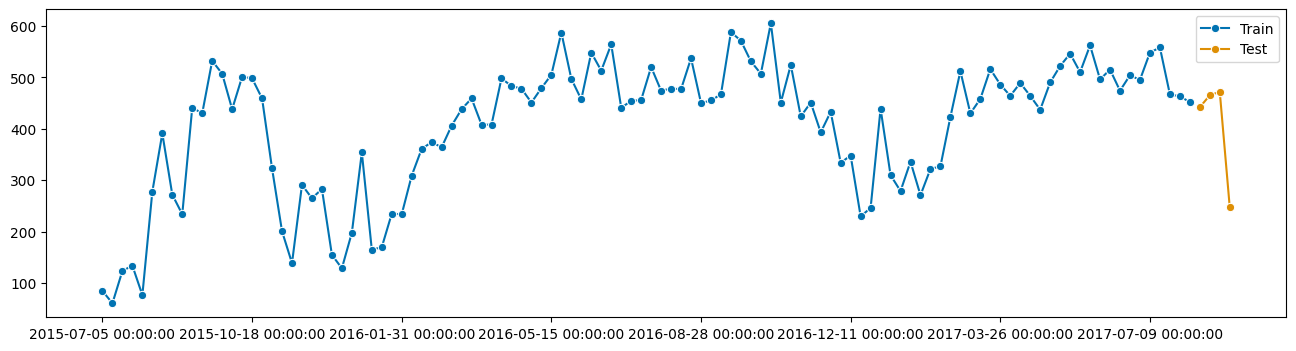

In [67]:
# Separamos train y test- test como esta por semanas quitamos 4

# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =df_w_r, test_size=4)
log_y_train, log_y_test = temporal_train_test_split(y =log_df_w_r, test_size=4)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [68]:
# comprobamos cuanto tiempo adelante estamos prediciendo

# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4])

In [69]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

In [70]:
#  Auto ARIMA Model

# Nosotros ajustaremos el modelo con 52 temporadas que son las semanas que tiene un año
forecaster = AutoARIMA(sp=52, suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=52, suppress_warnings=True)

In [71]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  110
Model:             SARIMAX(1, 1, 4)x(0, 0, [1], 52)   Log Likelihood                   5.434
Date:                              Wed, 20 Dec 2023   AIC                              3.133
Time:                                      17:49:02   BIC                             21.972
Sample:                                  07-05-2015   HQIC                            10.773
                                       - 08-06-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5457      0.153     -3.566      0.000      -0.846      -0.246
ma.L1          0.27

In [72]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

,IsCanceled
2017-08-13,6.141492
2017-08-20,6.123263
2017-08-27,6.101975
2017-09-03,6.024122


In [73]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

,IsCanceled
2017-08-13,464.746398
2017-08-20,456.351135
2017-08-27,446.739399
2017-09-03,413.278549


## Vamos a estudiar el rendimiento de nuestros modelos predictores

In [74]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [75]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)

0.028213933009390776

In [76]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mape_arima_r = mean_absolute_percentage_error(y_test, np.exp(log_y_pred))
mape_arima_r

0.19750653293820544

In [77]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.2582167371685329

In [78]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

84.47972859304842

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

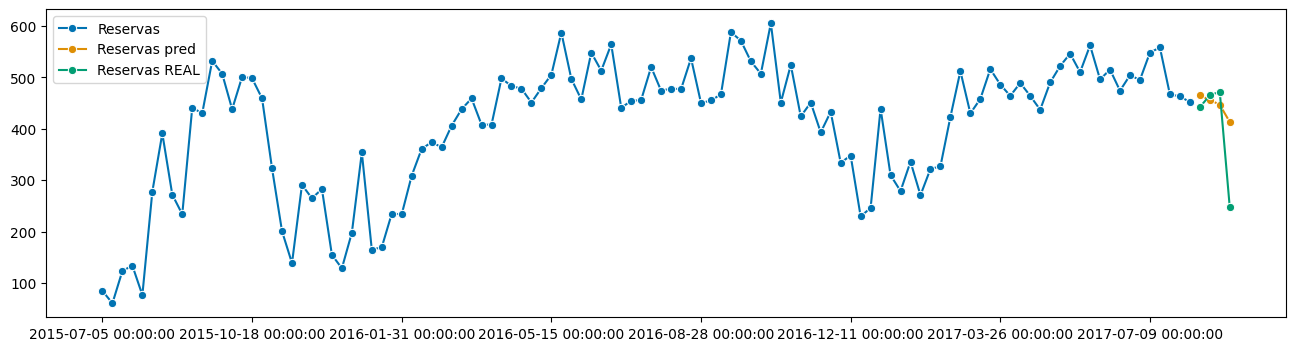

In [79]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["Reservas", "Reservas pred", "Reservas REAL"])

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

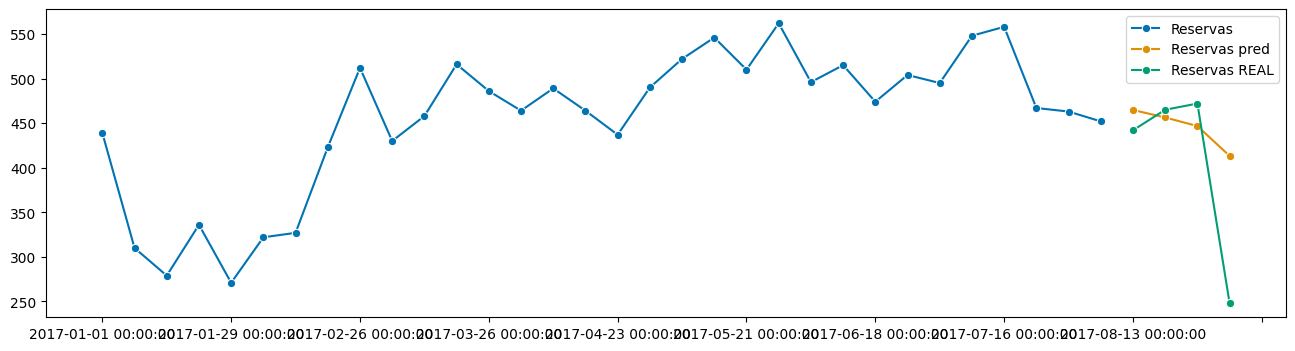

In [80]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2017 -
plot_series(y_train["2017":], np.exp(log_y_pred),y_test, labels=["Reservas", "Reservas pred", "Reservas REAL"])

---------

## Analisis Serie Cancelaciones

In [81]:
df_w_c = pd.read_csv('df_cancelaciones.csv')
df_w_c['ArrivalDate'] = pd.to_datetime(df_w_c['ArrivalDate'])
df_w_c = df_w_c.set_index('ArrivalDate')
df_w_c.head()

,IsCanceled
ArrivalDate,
2015-07-05,105
2015-07-12,163
2015-07-19,217
2015-07-26,318
2015-08-02,155


In [82]:
log_df_w_c = pd.read_csv('df_cancelaciones_LOG.csv')
log_df_w_c = log_df_w_c.rename(columns={'Unnamed: 0': 'ArrivalDate'})
log_df_w_c['ArrivalDate'] = pd.to_datetime(log_df_w_c['ArrivalDate'])
log_df_w_c = log_df_w_c.set_index('ArrivalDate')
log_df_w_c.head()

,IsCanceled
ArrivalDate,
2015-07-05,4.653960
2015-07-12,5.093750
2015-07-19,5.379897
2015-07-26,5.762051
2015-08-02,5.043425


110 4


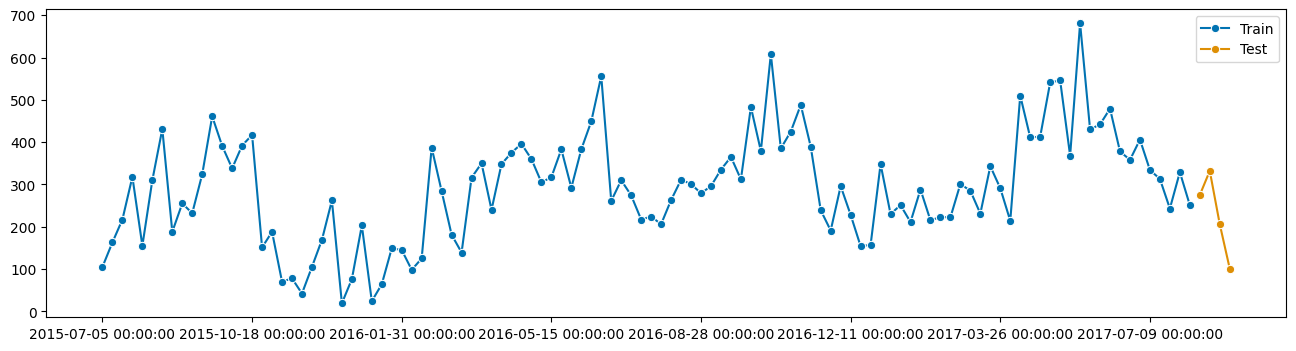

In [83]:
# Separamos train y test- test como esta por semanas quitamos 4

# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =df_w_c, test_size=4)
log_y_train, log_y_test = temporal_train_test_split(y =log_df_w_c, test_size=4)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [84]:
# comprobamos cuanto tiempo adelante estamos prediciendo

# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4])

In [85]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

In [86]:
#  Auto ARIMA Model

# Nosotros ajustaremos el modelo con 52 temporadas que son las semanas que tiene un año
forecaster = AutoARIMA(sp=52, suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=52, suppress_warnings=True)

In [87]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  110
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 52)   Log Likelihood                 -68.974
Date:                            Wed, 20 Dec 2023   AIC                            143.949
Time:                                    17:50:05   BIC                            152.023
Sample:                                07-05-2015   HQIC                           147.223
                                     - 08-06-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5920      0.067     -8.828      0.000      -0.723      -0.461
ma.S.L52       0.3322      0.197   

In [88]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

,IsCanceled
2017-08-13,5.673744
2017-08-20,5.744572
2017-08-27,5.689664
2017-09-03,5.718393


In [89]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

,IsCanceled
2017-08-13,291.122584
2017-08-20,312.489730
2017-08-27,295.794077
2017-09-03,304.415207


## Vamos a estudiar el rendimiento de nuestros modelos predictores

In [90]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [91]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)


0.08188418112541054

In [92]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mape_arima_c = mean_absolute_percentage_error(y_test, np.exp(log_y_pred))
mape_arima_c

0.6418247442809591

In [93]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.5820251760684729

In [94]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

111.8942703763647

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

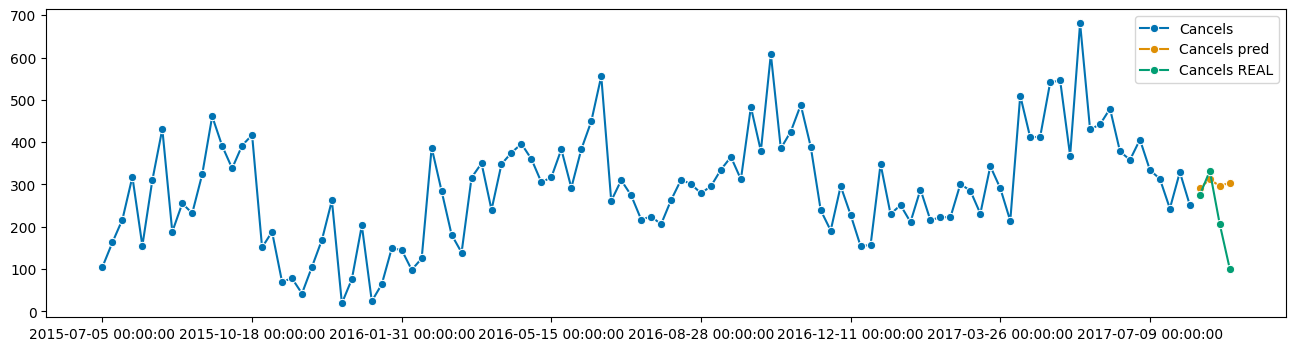

In [95]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

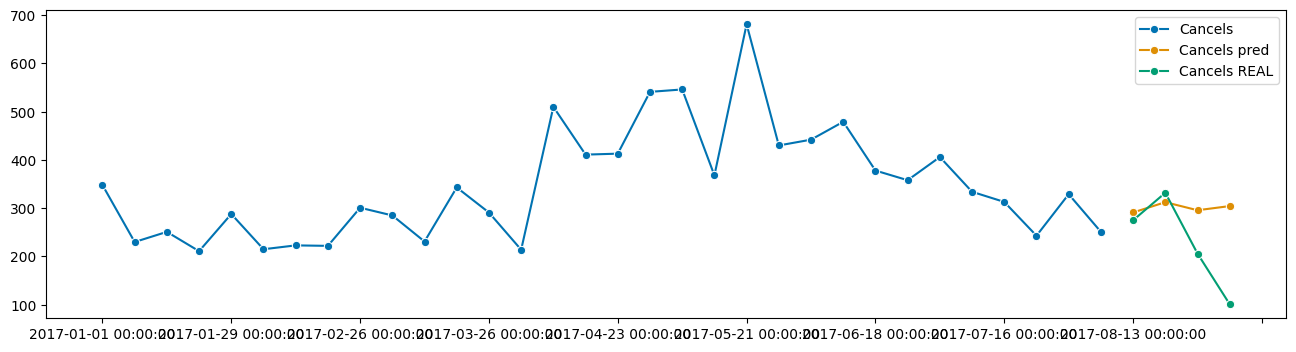

In [96]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2017 -
plot_series(y_train["2017":], np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])

In [99]:
mape_reservas = pd.DataFrame()
mape_reservas['Modelo_Reservas'] = ['ARIMA']
mape_reservas['MAPE'] = [mape_arima_r]
mape_reservas

,Modelo_Reservas,MAPE
0,ARIMA,0.197507


In [98]:
mape_cancelaciones = pd.DataFrame()
mape_cancelaciones['Modelo_Cancelaciones'] = ['ARIMA']
mape_cancelaciones['MAPE'] = [mape_arima_c]
mape_cancelaciones

,Modelo_Cancelaciones,MAPE
0,ARIMA,0.641825


In [100]:
mape_reservas.to_csv('mape_reservas.csv')

In [101]:
mape_cancelaciones.to_csv('mape_cancelaciones.csv')

------